<a href="https://colab.research.google.com/github/ArunPrasath1205/Machine-Learning/blob/main/ML_Tast_02_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.</b>

##Importing Libraries

In [2]:
import numpy as np 

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt


In [5]:
%matplotlib inline

In [6]:
import seaborn as sns

In [7]:
from scipy import stats #scientific python

##Mounting Drive and importing file into the colab

In [8]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [9]:
file = "/content/drive/MyDrive/Almabetter/Module 04 ML/housing.csv"

In [11]:
df = pd.read_csv(file)

##Data Understanding

In [12]:
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [13]:
df.columns

Index([' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'], dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0    0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00  505 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [15]:
df.describe()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
count,505
unique,505
top,0.02731 0.00 7.070 0 0.4690 6.4210 78...
freq,1


In [16]:
df.shape

(505, 1)

## Data Cleaning
We need to convert the numbers from the dataframe from object(string) to float type.

In [17]:
# Sorting out the Data with all rows and one column provided
# Because all the 14 values are provided in the single column
df.iloc[:,0]

0       0.02731   0.00   7.070  0  0.4690  6.4210  78...
1       0.02729   0.00   7.070  0  0.4690  7.1850  61...
2       0.03237   0.00   2.180  0  0.4580  6.9980  45...
3       0.06905   0.00   2.180  0  0.4580  7.1470  54...
4       0.02985   0.00   2.180  0  0.4580  6.4300  58...
                             ...                        
500     0.06263   0.00  11.930  0  0.5730  6.5930  69...
501     0.04527   0.00  11.930  0  0.5730  6.1200  76...
502     0.06076   0.00  11.930  0  0.5730  6.9760  91...
503     0.10959   0.00  11.930  0  0.5730  6.7940  89...
504     0.04741   0.00  11.930  0  0.5730  6.0300  80...
Name:  0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00, Length: 505, dtype: object

In [18]:

list_of_string = df.iloc[:,0]

In [19]:
# Defining the function to convert string into float
def map_(k):
  s=[]
  for i in k:
    n = float(i)
    s.append(n)
  return (s)

In [20]:
# Converting the each row in the df into a list resulting to new nested list
a = []
for i in range(len(list_of_string)):
  a.append(map_(list_of_string[i].split()))
print(a)


[[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14, 21.6], [0.02729, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03, 34.7], [0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94, 33.4], [0.06905, 0.0, 2.18, 0.0, 0.458, 7.147, 54.2, 6.0622, 3.0, 222.0, 18.7, 396.9, 5.33, 36.2], [0.02985, 0.0, 2.18, 0.0, 0.458, 6.43, 58.7, 6.0622, 3.0, 222.0, 18.7, 394.12, 5.21, 28.7], [0.08829, 12.5, 7.87, 0.0, 0.524, 6.012, 66.6, 5.5605, 5.0, 311.0, 15.2, 395.6, 12.43, 22.9], [0.14455, 12.5, 7.87, 0.0, 0.524, 6.172, 96.1, 5.9505, 5.0, 311.0, 15.2, 396.9, 19.15, 27.1], [0.21124, 12.5, 7.87, 0.0, 0.524, 5.631, 100.0, 6.0821, 5.0, 311.0, 15.2, 386.63, 29.93, 16.5], [0.17004, 12.5, 7.87, 0.0, 0.524, 6.004, 85.9, 6.5921, 5.0, 311.0, 15.2, 386.71, 17.1, 18.9], [0.22489, 12.5, 7.87, 0.0, 0.524, 6.377, 94.3, 6.3467, 5.0, 311.0, 15.2, 392.52, 20.45, 15.0], [0.11747, 12.5, 7.87, 0.0, 0.524, 6.009, 82.9, 6.2267, 5.0, 311.

In [21]:
new_df = pd.DataFrame(data = a,columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])

In [22]:
new_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    float64
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    float64
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


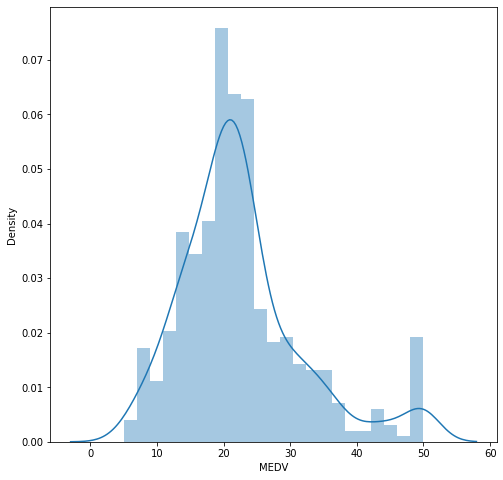

In [24]:
plt.figure(figsize= (8,8))
sns.distplot(new_df["MEDV"])

From the above observation it is found that, Dependent variable is in the form of the normal distribution with some outliers to the left side.

## Let us try plotting all the independent variables

In [25]:
range(len(new_df.columns))

range(0, 14)

In [26]:
import warnings
warnings.filterwarnings("ignore")

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


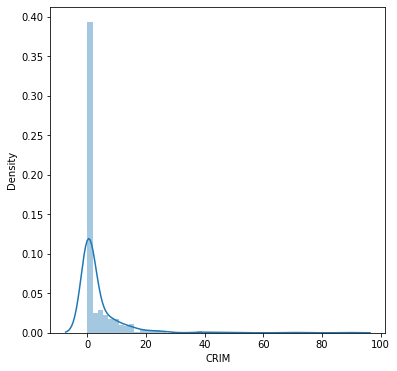

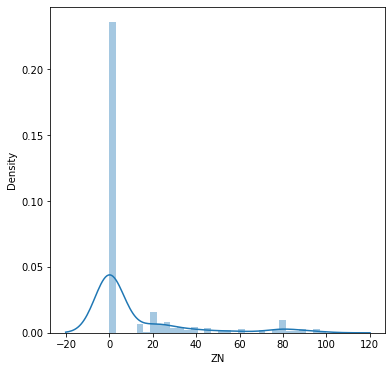

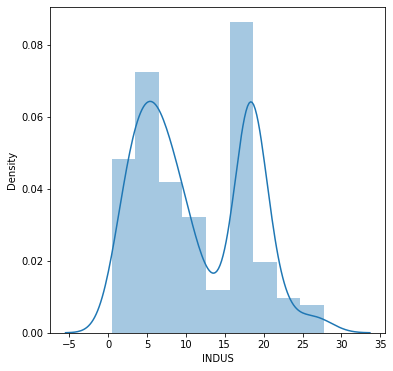

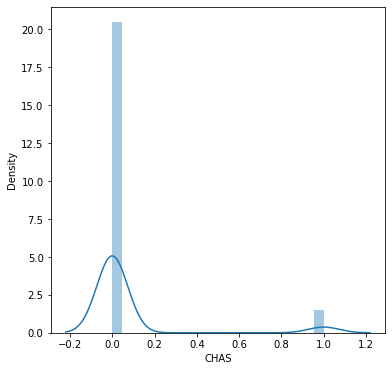

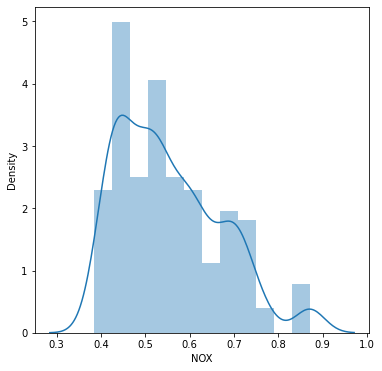

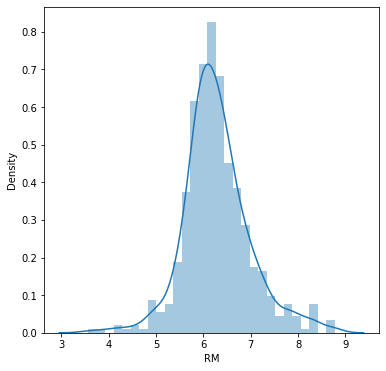

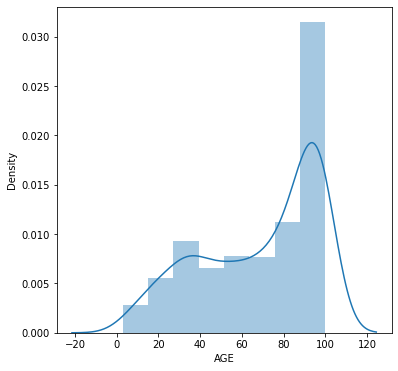

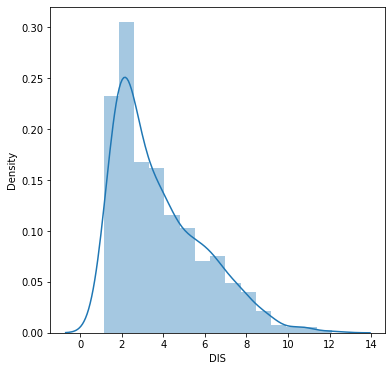

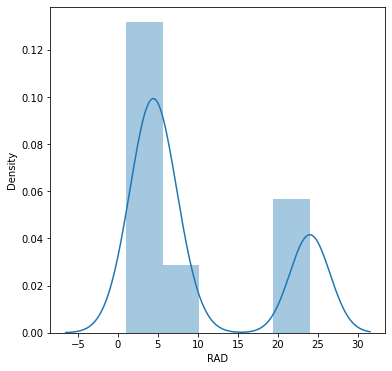

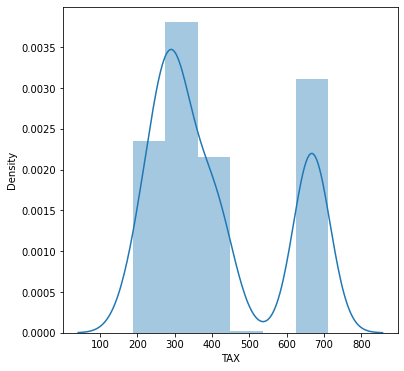

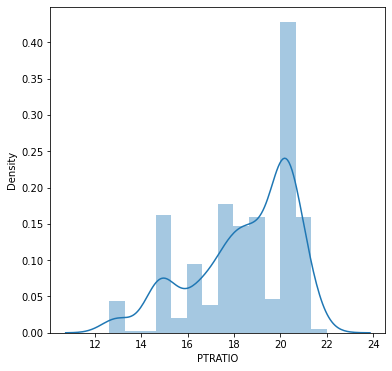

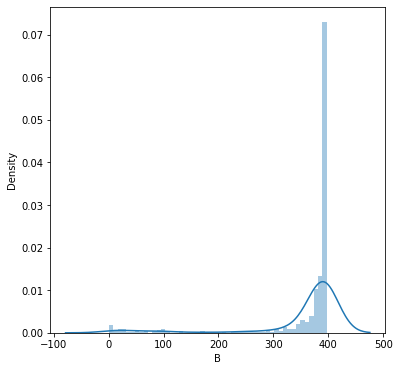

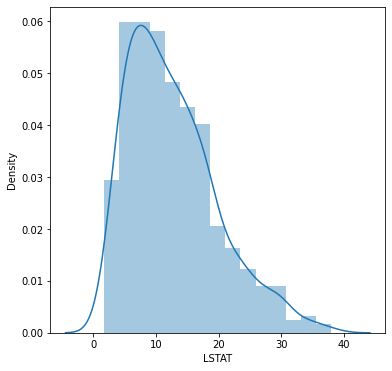

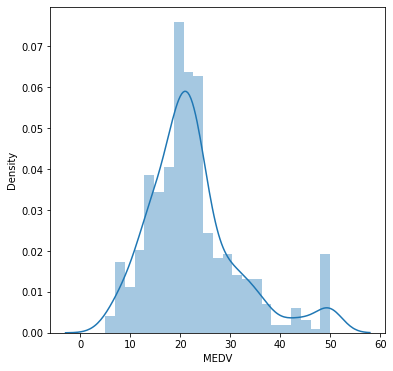

In [27]:
for i in new_df.columns:
  plt.figure(figsize = (6,6))
  plot = sns.distplot(new_df[str(i)])
  print(plot)


## Lets find the correlation between the dataset

In [28]:
new_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200283,0.406251,-0.056132,0.420934,-0.218978,0.352701,-0.379627,0.625396,0.582568,0.289394,-0.384839,0.455329,-0.388249
ZN,-0.200283,1.000000,-0.534022,-0.042550,-0.516574,0.311835,-0.569524,0.664395,-0.311717,-0.314351,-0.391713,0.175319,-0.412894,0.360393
INDUS,0.406251,-0.534022,1.000000,0.062350,0.764556,-0.391330,0.645543,-0.708848,0.594167,0.720561,0.380955,-0.356506,0.602737,-0.484126
CHAS,-0.056132,-0.042550,0.062350,1.000000,0.091134,0.091497,0.086461,-0.099109,-0.007907,-0.035965,-0.122570,0.049040,-0.054576,0.175364
NOX,0.420934,-0.516574,0.764556,0.091134,1.000000,-0.302127,0.731461,-0.769221,0.611758,0.668141,0.188918,-0.380006,0.591262,-0.427295
RM,-0.218978,0.311835,-0.391330,0.091497,-0.302127,1.000000,-0.240211,0.205170,-0.209277,-0.291680,-0.355116,0.127754,-0.613734,0.695365
AGE,0.352701,-0.569524,0.645543,0.086461,0.731461,-0.240211,1.000000,-0.747872,0.456232,0.506527,0.261724,-0.273486,0.602782,-0.376932
DIS,-0.379627,0.664395,-0.708848,-0.099109,-0.769221,0.205170,-0.747872,1.000000,-0.494798,-0.534492,-0.232561,0.291451,-0.497277,0.249896
RAD,0.625396,-0.311717,0.594167,-0.007907,0.611758,-0.209277,0.456232,-0.494798,1.000000,0.910202,0.463322,-0.444065,0.487608,-0.381690
TAX,0.582568,-0.314351,0.720561,-0.035965,0.668141,-0.291680,0.506527,-0.534492,0.910202,1.000000,0.460100,-0.441505,0.543435,-0.468543


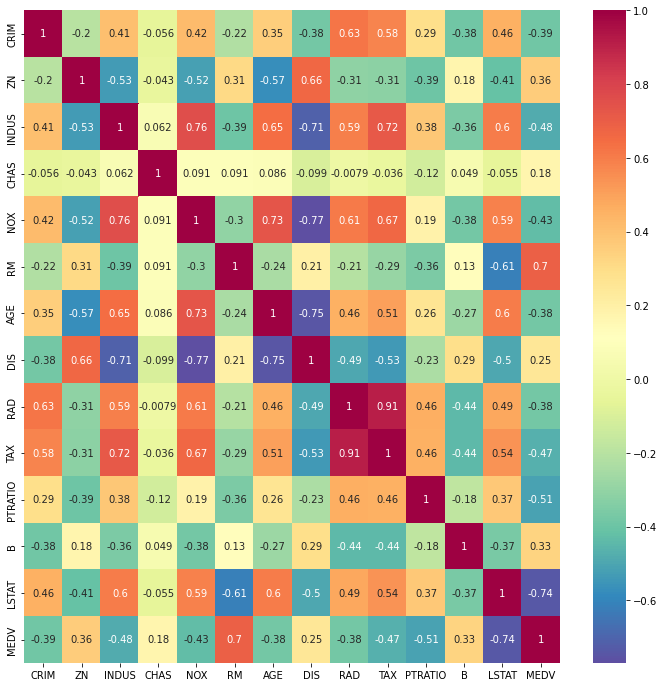

In [29]:
plt.figure(figsize = (12,12))
sns.heatmap(new_df.corr(), annot = True, cmap = "Spectral_r")

## Observation from the Correlation heatmap

With Respect Dependent Variable MEDV:

* Dependent variable MEDV is highly correlated with the RM (AVG numbers of rooms per dwelling)
* Also MEDV showing high negative correlation with LSTAT (Lower status of population)

With Respect to Independent Variable:

* RAD-TAX have hidh correlation of 0.91
* INDUS-NOX and AGE-DIS is -0.53,-0.75

Hence we may avoid INDUS,AGE,IDS,TAX as they exibit multi-co-linearity

##Let us plot scatter plot between MEDV vs LSTAT


Text(0, 0.5, 'LSTAT')

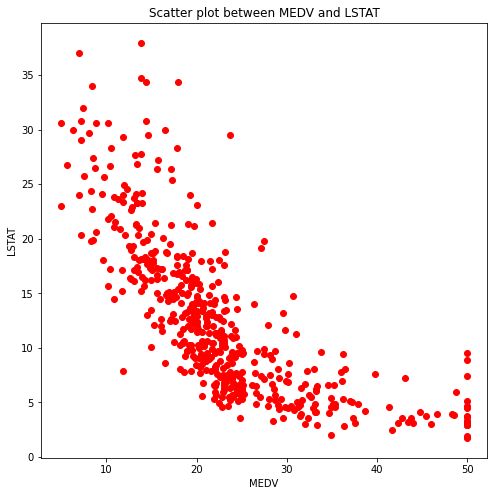

In [30]:
plt.figure(figsize = (8,8))
x = new_df["MEDV"]
y = new_df["LSTAT"]
plt.scatter(x,y,color = "red")
plt.title("Scatter plot between MEDV and LSTAT")
plt.xlabel("MEDV")
plt.ylabel("LSTAT")

Scatter Plot between the MEDV and LSTAT shows that,
* It is linearly correlated
* Also we found that, if the lower status of the population decreases MEDV increases.

##Let us plot scatter plot between MEDV vs RM

Text(0, 0.5, 'RM')

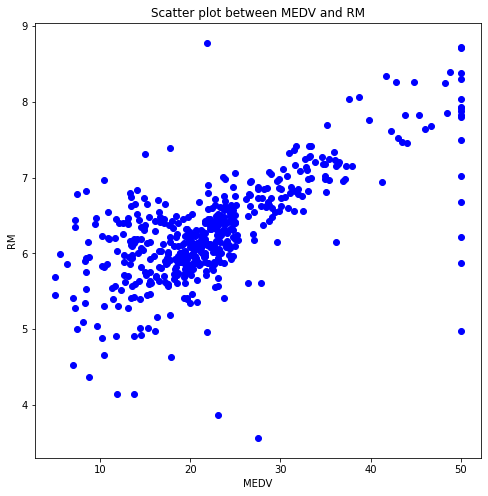

In [31]:
plt.figure(figsize = (8,8))
x = new_df["MEDV"]
y = new_df["RM"]
plt.scatter(x,y,color = "blue")
plt.title("Scatter plot between MEDV and RM")
plt.xlabel("MEDV")
plt.ylabel("RM")

* The above plot suggests positive linear regression,
* which again agrees with the heatmap and makes sense 
* if we see the column we can tell as number of rooms per dwelling increase, no. of owner-occupied homes in price range of $1000 would decrease.

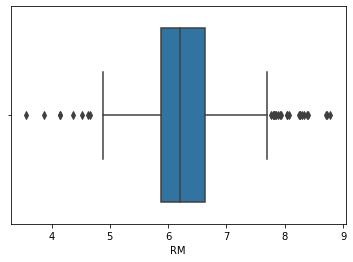

In [32]:
sns.boxplot(new_df["RM"])

fROM THE ABOVE OBSERVATION BETWEEN MEDV and RM

* Apart from few outliers 
* It was Positively linear correlated
* Which means, as the Rooms increases, MEDV also increases.

In [33]:
new_df["RM"].describe()

count    505.000000
mean       6.284059
std        0.703195
min        3.561000
25%        5.885000
50%        6.208000
75%        6.625000
max        8.780000
Name: RM, dtype: float64

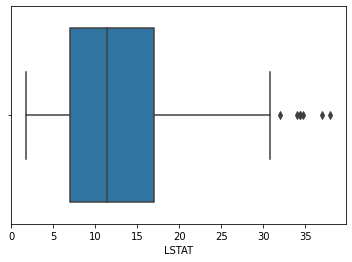

In [34]:
sns.boxplot(new_df["LSTAT"])

In [36]:
new_df["LSTAT"].describe()

count    505.000000
mean      12.668257
std        7.139950
min        1.730000
25%        7.010000
50%       11.380000
75%       16.960000
max       37.970000
Name: LSTAT, dtype: float64

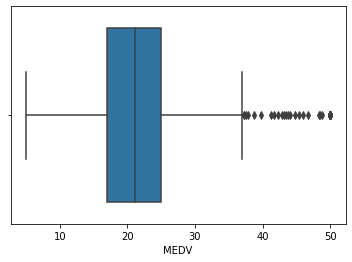

In [37]:
sns.boxplot(new_df['MEDV'])

In [38]:
new_df['MEDV'].describe()

count    505.000000
mean      22.529901
std        9.205991
min        5.000000
25%       17.000000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

* LSTAT and RM do not consist a lot of outliers too
* therefore I would say we can easily consider these columns to make any predictions.

Text(0, 0.5, 'PTRATIO')

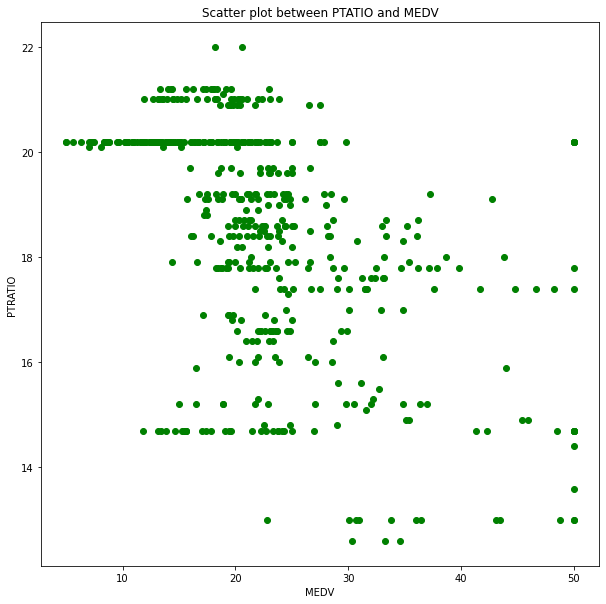

In [39]:
plt.figure(figsize = (10,10))
x = new_df["MEDV"]
y = new_df["PTRATIO"]
plt.scatter(x,y, color ="green")
plt.title("Scatter plot between PTATIO and MEDV")
plt.xlabel("MEDV")
plt.ylabel("PTRATIO")

* PTRATIO is second highest negative correlated value but as per the first assumption, the relation between dependent and independent variables must be linear which is not here.

* Hence to conclude, LSTAT and RM are the best possible independent variables to make any future predictions about our dependent variable MEDV.

##Calculating the best fit line for RM and MEDV.

In [53]:
# Formula for bestfit for one indpendent variable
# bestfit = b0 + x*b1

In [50]:
rmdf = {"y":new_df["MEDV"],"x": new_df["RM"]}
rmdf = pd.DataFrame(rmdf)
rmdf["x2"] = rmdf["x"]**2
rmdf["xy"] = rmdf["x"]*rmdf["y"]

In [51]:
rmdf.head()

,y,x,x2,xy
0,21.6,6.421,41.229241,138.6936
1,34.7,7.185,51.624225,249.3195
2,33.4,6.998,48.972004,233.7332
3,36.2,7.147,51.079609,258.7214
4,28.7,6.430,41.344900,184.5410


In [54]:
# To find b1

n = len(rmdf["x"])


505

In [61]:
xys = rmdf["xy"].sum()
xs = rmdf["x"].sum()
ys = rmdf["y"].sum()
x2s = rmdf["x2"].sum()
xbar = xs/n
ybar = ys/n
b1 = (n*xys- xs*ys)/(n*x2s - xs)
b0 = ybar - (b1*xbar)
print(b1)
print(b0)

0.11239801390640114
21.823585193601446


In [64]:
bestfit_line = b0 + b1*x
bestfit_line

0      24.251382
1      25.723796
2      25.577679
3      25.892393
4      25.049408
         ...    
500    24.341301
501    24.138984
502    24.509898
503    24.296341
504    23.161122
Name: MEDV, Length: 505, dtype: float64

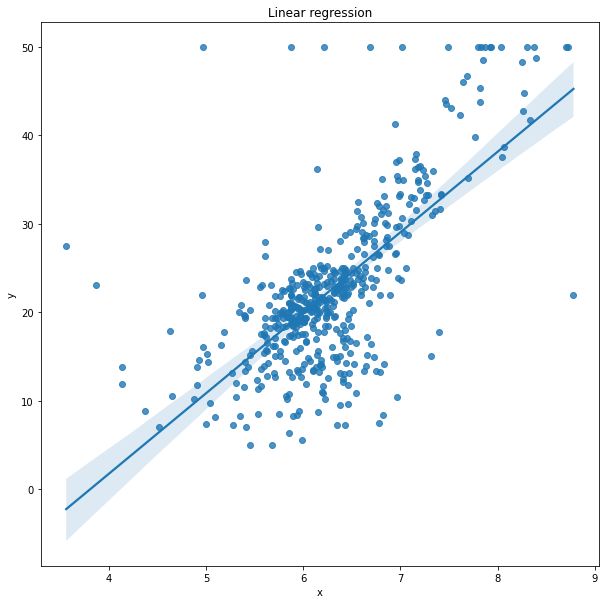

In [65]:
plt.figure(figsize = (10,10))
plt.title("Linear regression")
plt.xlabel("RM")
plt.ylabel("MEDV")
sns.regplot(x = rmdf["x"],y= rmdf["y"])

##Calculating the best fit line for LSTAT and MEDV.

In [66]:
ldf={'y':new_df['MEDV'],'x':new_df['LSTAT']}
ldf=pd.DataFrame(ldf)
ldf['x2']= ldf['x']**2
ldf['xy']= ldf['x']*ldf['y']

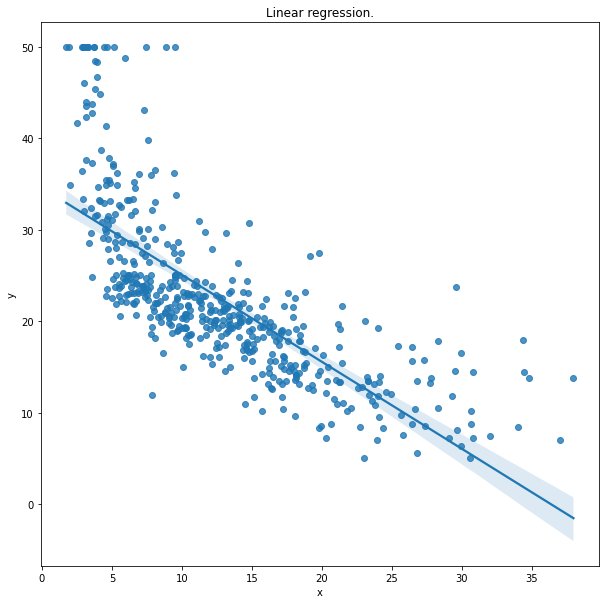

In [67]:
plt.figure(figsize=(10,10))
plt.title('Linear regression.')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
sns.regplot(x=ldf['x'],y=ldf['y'])